In [283]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [284]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [285]:
sestset = pd.read_parquet(os.path.join("data/cnb_sloupce","600.parquet"))

In [286]:
sestset

,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y
001,,,,,,,,,,,,,,,,,,,,
ck8300101,[1],[7],"[Lunačarskij, Anatolij Vasil'jevič,]",[1875-1933],[jn19981001778],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
srk19960000328,[1],[7],"[Kotrba, Heřman,]",[1913-1989],[jz8600488],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8300314,[1],[7],"[Sudek, Josef,]",[1896-1976],[jk01121661],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8300361,"[0, 0]","[7, 7]","[Désirée,, Napoleon]","[1777-1860, 1769-1821]","[jn20031021014, jn20000604140]","[czenas, czenas]","[královna, choť Karla XIV. Jana, švédského a n...","[None, I.,]",None,None,None,None,None,None,None,None,None,None,None,None
ck8300374,[1],[7],"[García Lorca, Federico,]",[1898-1936],[jn19981001316],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243632367,[1],[7],"[Haňková, Eva,]",[1925-],[xx0055450],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
cpk20243632419,[1],[7],"[Hus, Jan,]",[asi 1371-1415],[jk01043287],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
cpg20243632428,[1],[7],"[Křižík, František,]",[1847-1941],[jk01070202],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [287]:
sestset[sestset['600_a'].astype(str).str.contains('Marie')]

,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y
001,,,,,,,,,,,,,,,,,,,,
ck8301407,[1],[7],"[Zieglerová, Marie,]",[1881-1966],[jk01152589],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8301933,[1],[7],"[Pujmanová, Marie,]",[1893-1958],[jk01101703],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8601177,"[1, 1]","[7, 7]","[Kalkusová, Marie,, Kalkus, František,]","[1893-1979, 1894-1968]","[jn20000728277, jn20000728276]","[czenas, czenas]",None,None,None,None,None,None,None,None,None,None,None,None,None,None
ck8601996,[0],[7],"[Marie Terezie,]",[1717-1780],[jn20000701157],[czenas],"[česká a uherská královna, císařovna, choť Fra...",None,None,None,None,None,None,None,None,None,None,None,None,None
ck8604211,[1],[7],"[Těšitelová, Marie,]",[1921-2011],[jk01132304],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243613982,[1],[7],"[Ladrová, Marie,]",[1981-],[mzk20221160340],[czenas],None,None,None,None,None,None,None,None,None,None,None,None,None,None
cpk20243613995,"[0, 0, 0, 0]","[7, 7, 9, 9]","[Marie,, Louis-Marie Grignion de Montfort,, Ma...","[None, 1673-1716, None, 1673-1716]","[ola2002100464, jn19990002892, None, None]","[czenas, czenas, eczenas, eczenas]","[Panna, svatý,, Blessed Virgin, Saint, Saint,]",None,None,None,None,None,None,None,None,None,None,None,None,None
nkc20243614256,"[1, 1]","[7, 7]","[Křivánková, Marie,, Filipová, Zdeňka,]","[1910-1991, 1933-]","[jo20241232268, jo20241232267]","[czenas, czenas]",None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [288]:
def hezke_jmeno(radek):
    cislo, roky = "", ""
    jmeno = radek['600_a'][0]
    if jmeno[-1] == ',':
        jmeno = jmeno[:-1]
    try:
        if len(radek['600_b']) > 0:
            cislo = radek['600_b'][0].replace(',','')
    except:
        pass
    try:
        if len(radek['600_d']) > 0:
            roky = f"({radek['600_d'][0]})"
    except:
        pass
    return f"{jmeno} {cislo}{roky}".replace('(None)','').strip()

In [289]:
sestset['kdo'] = sestset.apply(lambda row: hezke_jmeno(row), axis=1)
sestset['kdo'].sample(200)

001
bk195102590                 Stalin, Iosif Vissarionovič (1879-1953)
nkc20162843124                     Hallbeck, Hans Peter (1784-1840)
nkc20172933712                                 Halla, Karel (1943-)
cpk20000962861                            Hitler, Adolf (1889-1945)
cpk20021123087                          Šlouf, Miroslav (1948-2018)
nkc20051633853                                Pavel (asi 10-asi 67)
cpk20223464383                               Souček, Václav (1932-)
cpk20203219901                       Tomášek, František (1871-1938)
nkc20162772639                            Hanka, Václav (1791-1861)
nkc20152681334                               Černický, Jiří (1966-)
nkc20091929506                    Trenck, Franz von der (1711-1749)
nkc20102105151            Xenofón (asi 426 př. Kr.-asi 357 př. Kr.)
nkc20233548426                            Skomarovský, Jiří (1922-)
nkc20071720755                           Satjá Saí Baba (1926-2011)
nkc20213347230      Sigrid Storråda (činná 1

In [290]:
df = df.merge(sestset, left_index=True, right_index=True, how="left")

In [291]:
df_expl = df.explode('kdo')

In [292]:
df_expl[df_expl['rok'] > 2000].groupby('kdo').size().nlargest(100)

kdo
Ježíš Kristus                                    434
Masaryk, Tomáš Garrigue (1850-1937)              190
Marie                                            164
Karel IV.(1316-1378)                             136
Hitler, Adolf (1889-1945)                        135
Komenský, Jan Amos (1592-1670)                    94
Baťa, Tomáš (1876-1932)                           84
Havel, Václav (1936-2011)                         81
Hus, Jan (asi 1371-1415)                          80
Habsburkové (rod)                                 78
Beneš, Edvard (1884-1948)                         70
Hrabal, Bohumil (1914-1997)                       67
Kafka, Franz (1883-1924)                          67
Leonardo (1452-1519)                              61
Verne, Jules (1828-1905)                          59
Shakespeare, William (1564-1616)                  57
Janáček, Leoš (1854-1928)                         54
Heydrich, Reinhard (1904-1942)                    53
Platón (427 př. Kr.-347 př. Kr.)          

In [293]:
df_expl.groupby('kdo').size().nlargest(100)

kdo
Ježíš Kristus                               786
Masaryk, Tomáš Garrigue (1850-1937)         600
Marie                                       359
Komenský, Jan Amos (1592-1670)              305
Hus, Jan (asi 1371-1415)                    257
Karel IV.(1316-1378)                        188
Hitler, Adolf (1889-1945)                   175
Beneš, Edvard (1884-1948)                   161
Čapek, Karel (1890-1938)                    145
Lenin, Vladimir Il‘jič (1870-1924)          142
Havel, Václav (1936-2011)                   125
Habsburkové (rod)                           117
Němcová, Božena (1820-1862)                 117
Hrabal, Bohumil (1914-1997)                 113
Mácha, Karel Hynek (1810-1836)              113
Václav (asi 907-asi 935)                    109
Baťa, Tomáš (1876-1932)                     108
Janáček, Leoš (1854-1928)                   108
Smetana, Bedřich (1824-1884)                108
Kafka, Franz (1883-1924)                    107
Stalin, Iosif Vissarionovič (1879-19

In [337]:
df[df['kdo'].str.contains('(rod)',na=False)].groupby('kdo').size().nlargest(100)

C:\Users\micha\AppData\Local\Temp\ipykernel_23444\3206805336.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['kdo'].str.contains('(rod)',na=False)].groupby('kdo').size().nlargest(100)


kdo
Habsburkové (rod)                               117
Přemyslovci (rod)                                65
Lucemburkové (rod)                               31
Rožmberkové (rod)                                30
Lichtenštejnové (rod)                            29
Schwarzenbergové (rod)                           17
Pernštejnové (rod)                               16
Kinští (rod)                                     12
Vítkovci (rod)                                   12
Borgiové (rod)                                   10
Lobkowiczové (rod)                                9
Tudorovci (rod)                                   9
Windsorové (rod)                                  9
<<z >>Valdštejna (rod)                            8
<<z >>Hradce (rod)                                7
Brodský, Vlastimil (1920-2002)                    7
Chotkové (rod)                                    7
Dietrichsteinové (rod)                            7
Romanovci (rod)                                   7
Sanson (

<Axes: xlabel='rok'>

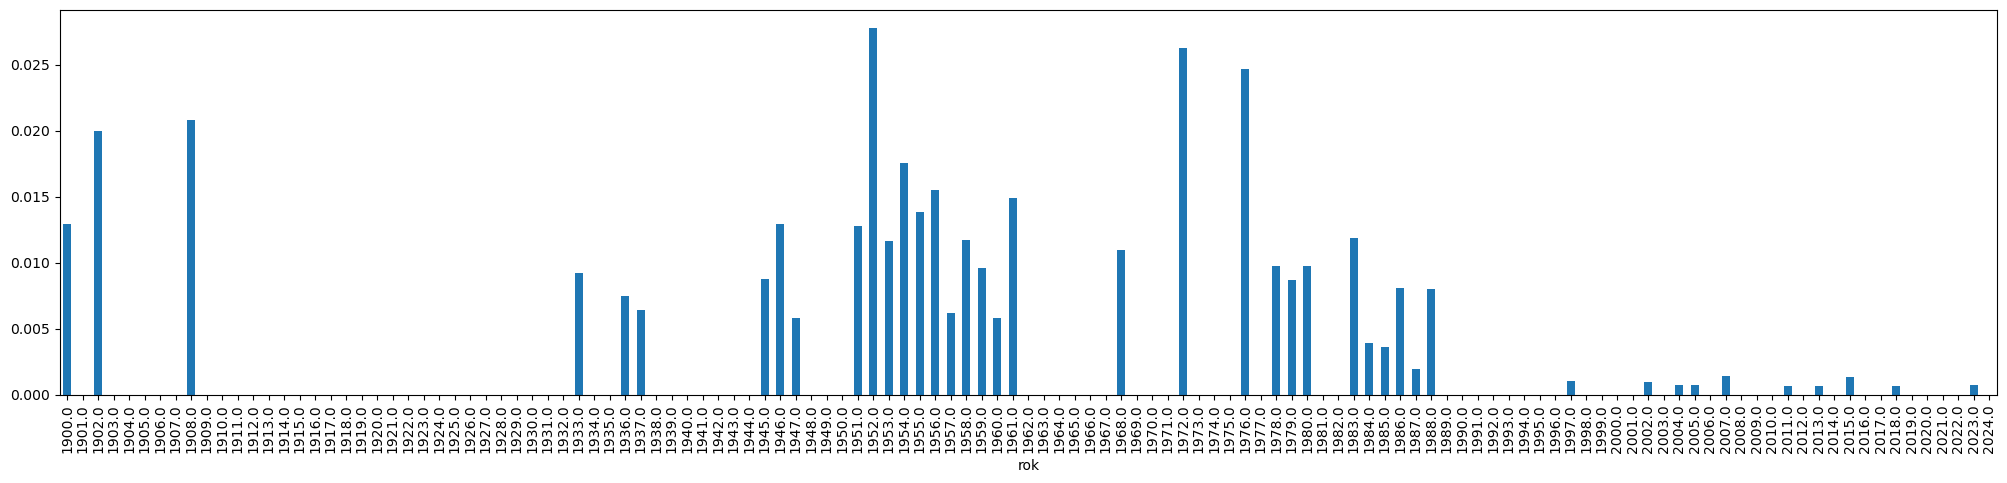

In [294]:
graf('Marx, Karl (1818-1883)')

<Axes: xlabel='rok'>

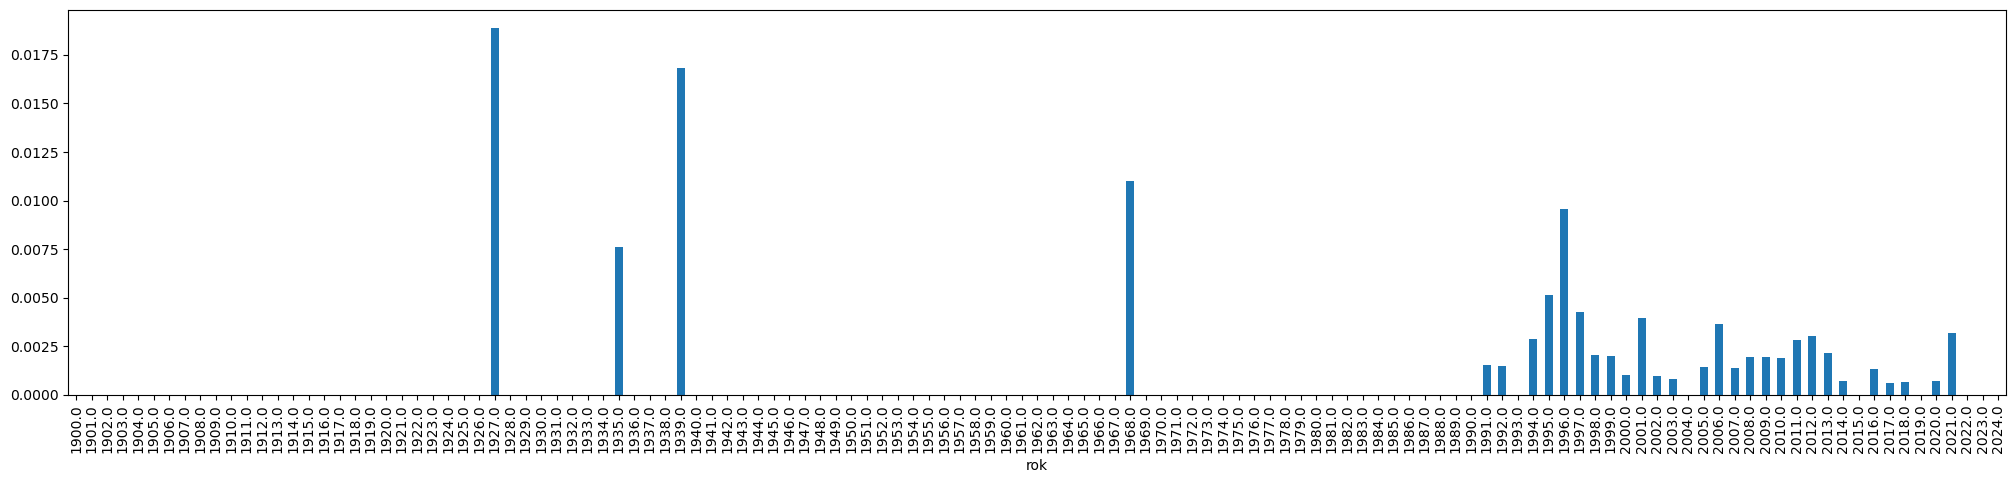

In [295]:
graf('Buddha (asi 563 př. Kr.-asi 483 př. Kr.)')

<Axes: xlabel='rok'>

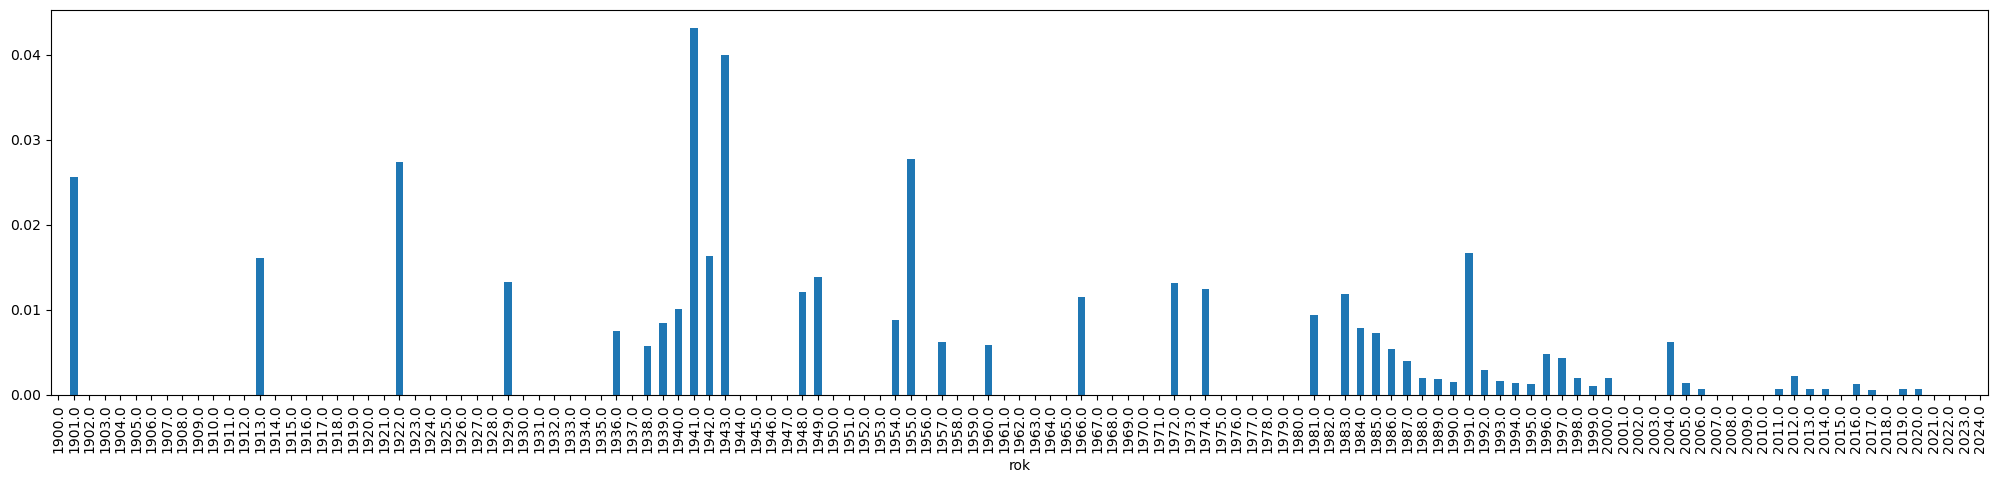

In [296]:
graf('Dvořák, Antonín (1841-1904)')

<Axes: xlabel='rok'>

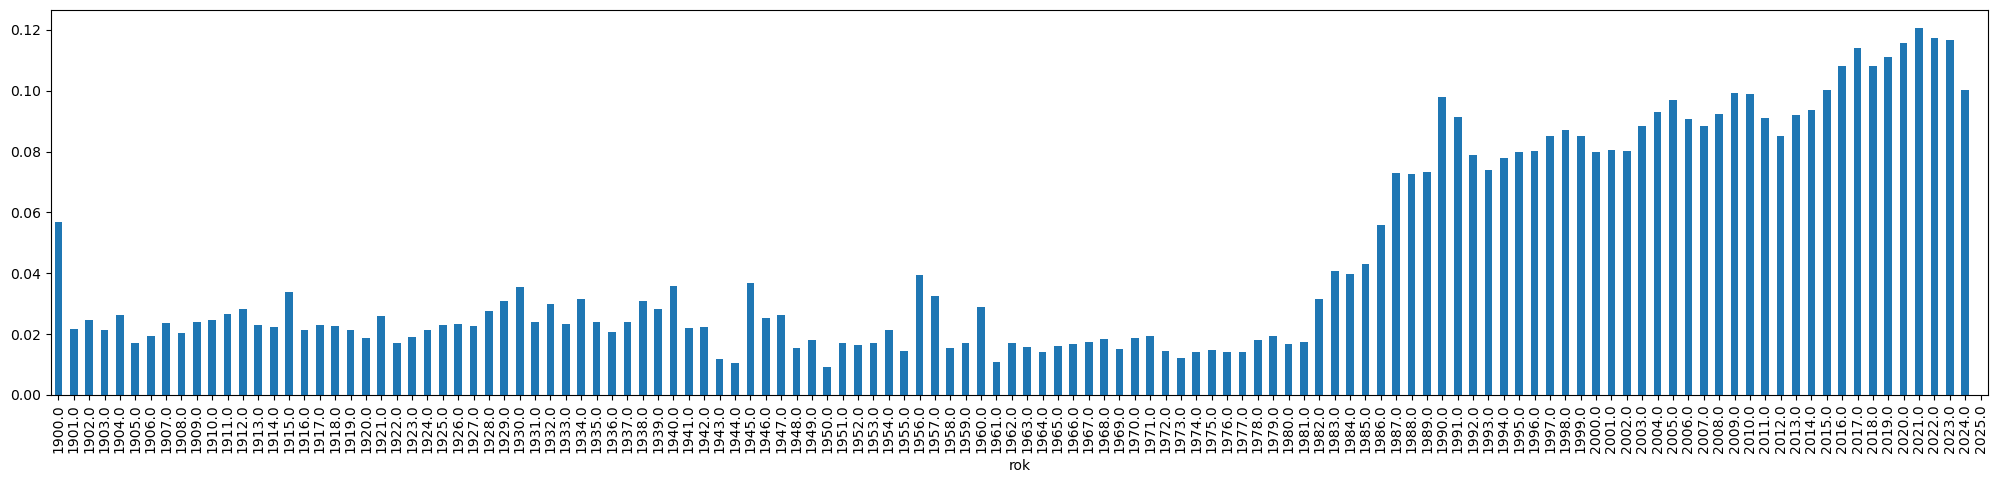

In [297]:
(df[df['600_a'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

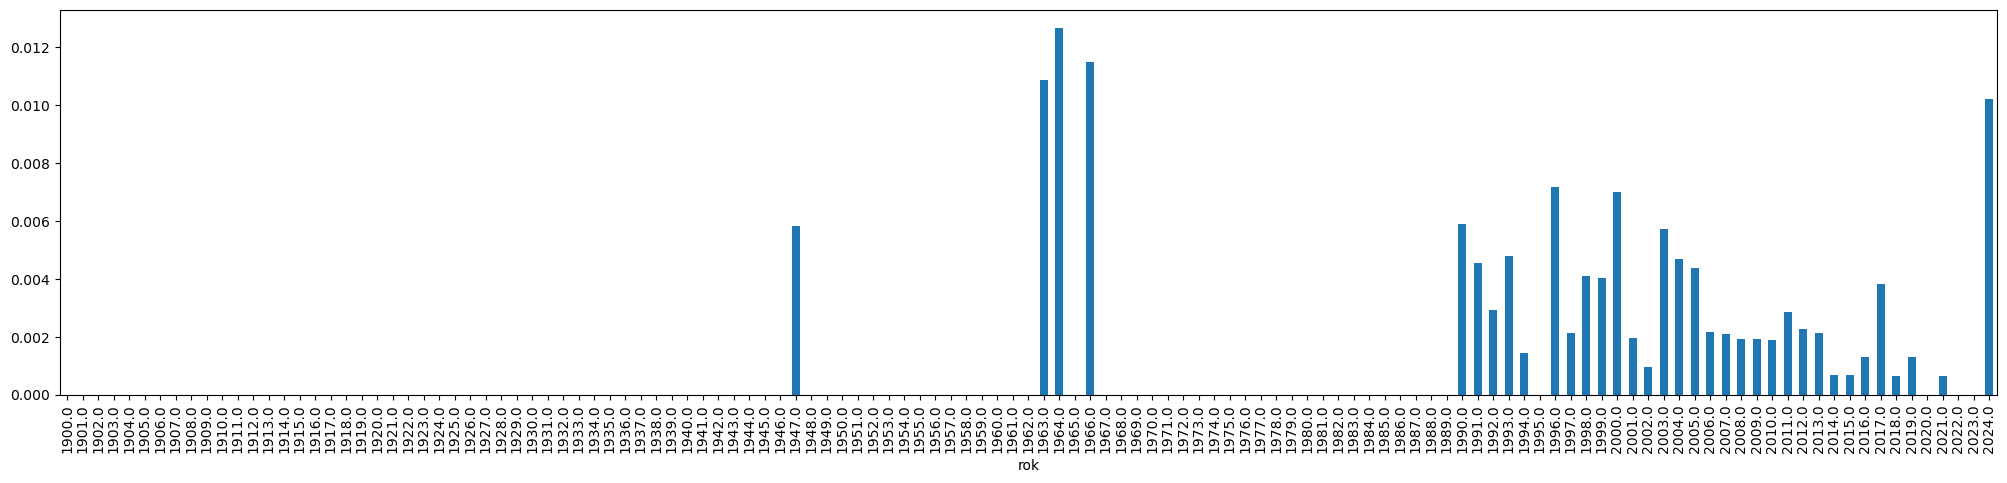

In [298]:
graf('Kafka, Franz (1883-1924)')

In [299]:
df[df['kdo'] == 'Marie']

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,600_ind1,600_ind2,600_a,600_d,600_7,600_2,600_c,600_b,600_t,600_q,600_x,600_n,600_r,600_l,600_p,600_k,600_m,600_o,600_z,600_y,kdo
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk192803339,990718s1928 xr g 000 1 cze,None,None,[(Brožováno)],[cze],[ita],1,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-312.47-5, 272-184.3, 27-4, 272-549, 27-534...",[aut],jk01111475,"Skalík, František,",1867-1904,None,Eucharistický Zdrávas /,od autora Eucharistických jisker ; z italštiny...,None,None,None,None,None,None,None,None,None,None,None,"[V Olomouci-Řepčíně :, Lidové závody tiskařské...","[[nakladatel není známý],, None]","[1928, None]","[1, 3]",[38 stran ;],None,[14 cm],None,None,None,None,None,None,None,None,"[katolická víra, křesťanský život, eucharistie...",None,None,None,None,None,[úvahy],None,None,None,None,[trl],[osa2012697594],[Dominikánky kongregace],None,None,None,None,nam a22 i 4500,1928.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193001189,000505s1930 xr e f 000 mdcze,None,None,[(Brožováno)],None,None,None,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-563.5, 272-534.35, 27-312.47, 27-312.47-5,...",None,None,None,None,None,Církevní hodinky k uctění blahoslavené Panny M...,None,None,None,None,None,None,None,None,None,None,None,None,[V Olomouci :],"[nákladem ""Serafínských květů"",]",[[1930?]],[1],[111 stran ;],None,[17 cm],None,None,None,None,None,None,None,None,"[liturgie hodin, katolické modlitby, mariánský...",None,None,None,None,None,[příručky],None,None,None,None,None,None,None,None,None,[Serafínské květy],None,nam a22 i 4500,1930.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193203977,000211s1932 xr af g 000 0dcze,None,None,[(Brož.)],None,None,None,None,[27-5],[Liturgie. Křesťanské umění a symbolika. Ducho...,"[27-312.47-587.5, 726.5:27-567-312.47, (44), (...",[aut],jk01121563,"Stříž, Antonín Ludvík,",1888-1960,None,La Saletta :,Antonín Stříž,None,None,None,None,None,[V Praze :],"[Ladislav Kuncíř,]",[1932],None,None,None,None,None,None,None,"[185 s., [1] l. obr. příl. :]",[il. ;],[18 cm],[Vinice Páně],None,None,None,None,None,[Český text],"[1846, 19. století]","[mariánská zjevení, mariánská poutní místa]",None,"[19. století, None]","[Francie, Francie]",[La Salette (Francie)],None,[pojednání],None,None,None,None,None,None,None,None,[Vinice Páně (Ladislav Kuncíř)],None,None,nam a22 a 4500,1932.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193206057,000505s1928 xr e 000 1 cze,None,None,[(Brožováno)],None,None,None,None,[27],[Křesťanství. Křesťanská církev všeobecně. Ekl...,"[27-184.3, 27-312.47-5, 27-584, 27-4, 27-583, ...",[aut],jk01141496,"Vaněk, František Bernard,",1872-1943,None,Zdrávas Maria :,Fr. B. Vaněk,None,None,None,[II. vydání],None,None,None,None,None,None,None,"[V Pelhřimově :, None]","[[nakladatel není známý],, Tiskem E. Šprongla]","[1928, None]","[1, 3]",[101 stran ;],None,[24 cm],"[Příloha ""Kazatelny"" ;]",[svazek XXXIX.],None,None,None,None,None,None,"[křesťanská víra, mariánský kult, duchovní živ...",None,None,None,None,None,[úvahy],None,None,None,None,None,None,None,None,[Příloha Kazatelny],None,None,nam a22 i 4500,1928.0,[0],[7],"[Marie,]",None,[ola2002100464],[czenas],[Panna],None,None,None,None,None,None,None,None,None,None,None,None,None,Marie
bk193402436,990812s1934 xr e f 000 1dcze

In [300]:
def graf(jmeno):
    return (df[df['kdo'] == jmeno].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

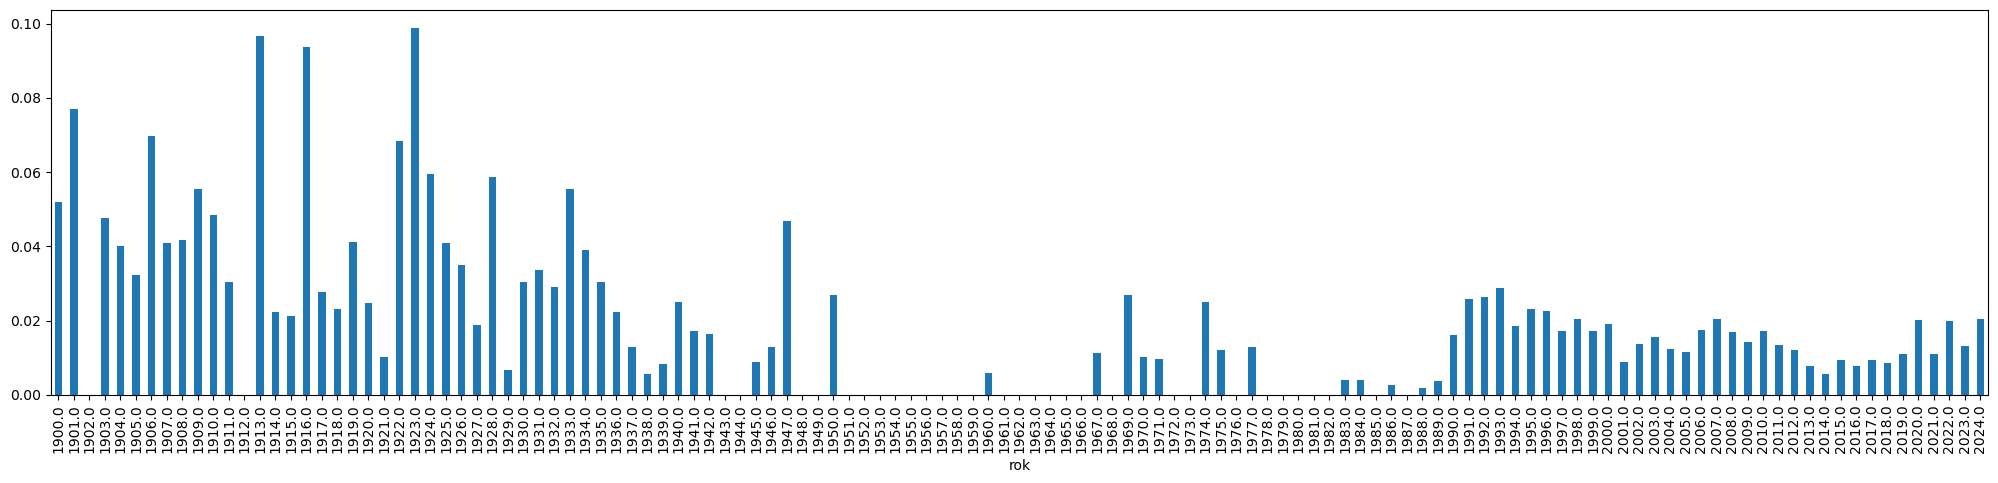

In [301]:
graf('Ježíš Kristus')

<Axes: xlabel='rok'>

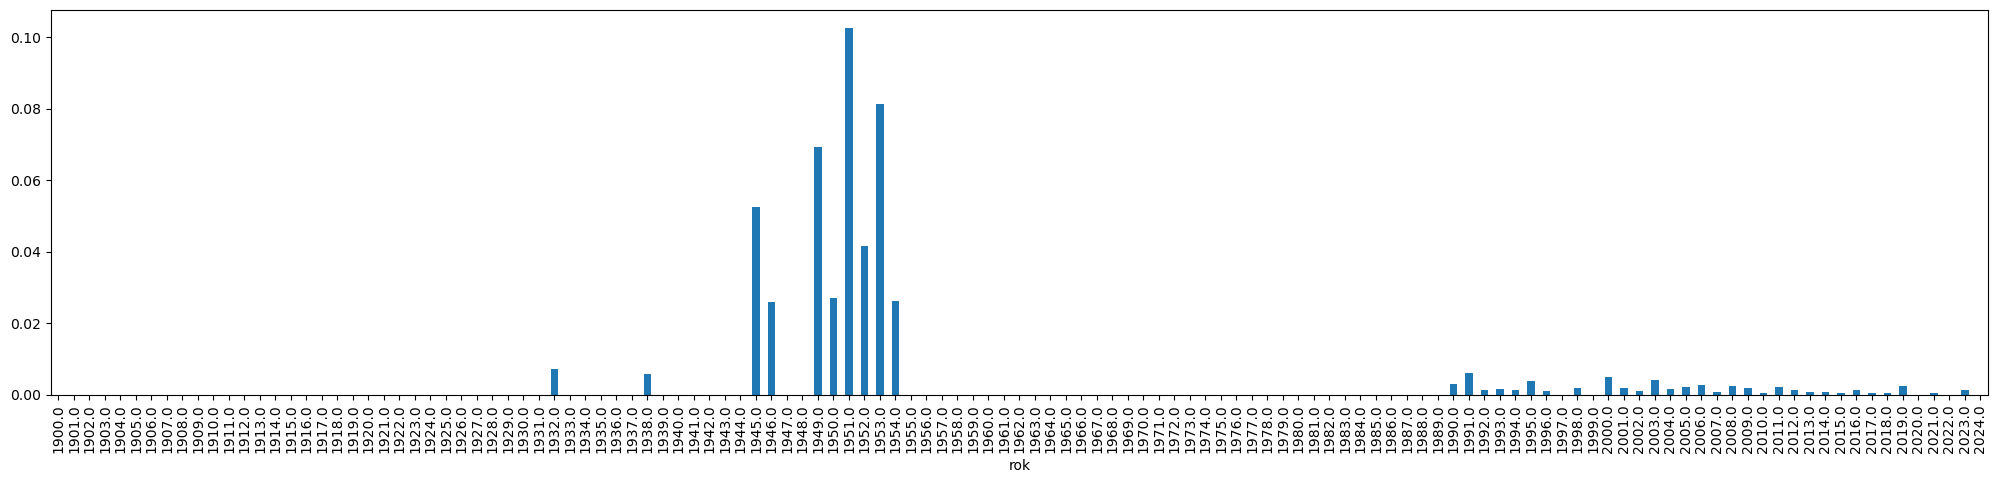

In [302]:
graf('Stalin, Iosif Vissarionovič (1879-1953)')

<Axes: xlabel='rok'>

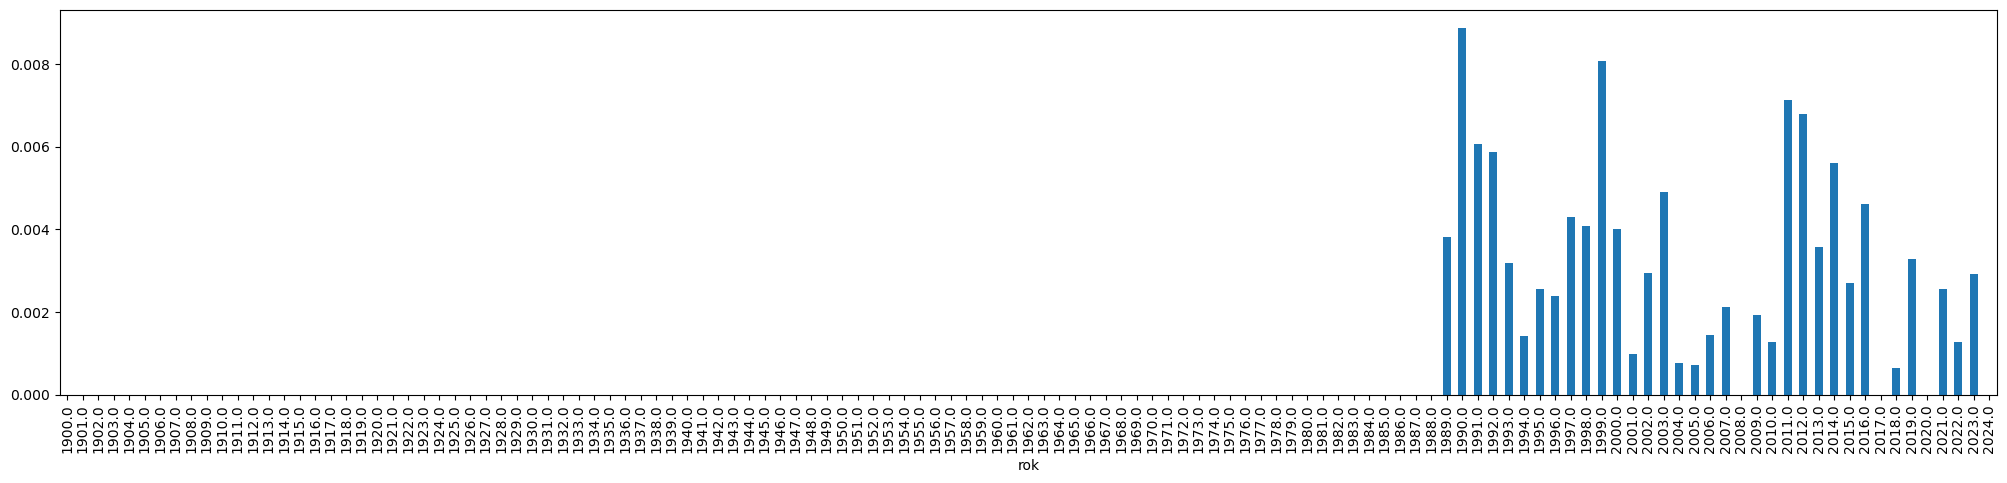

In [303]:
graf('Havel, Václav (1936-2011)')

<Axes: xlabel='rok'>

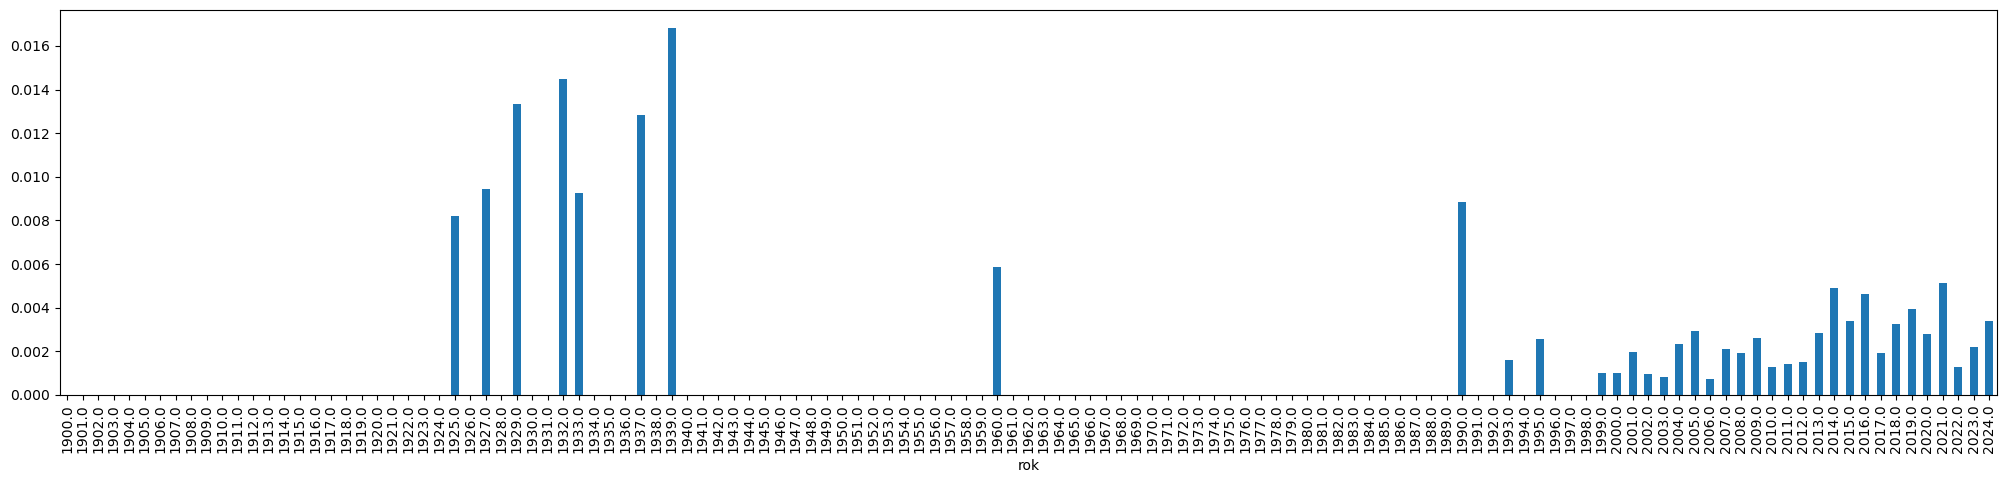

In [304]:
graf('Baťa, Tomáš (1876-1932)')

<Axes: xlabel='rok'>

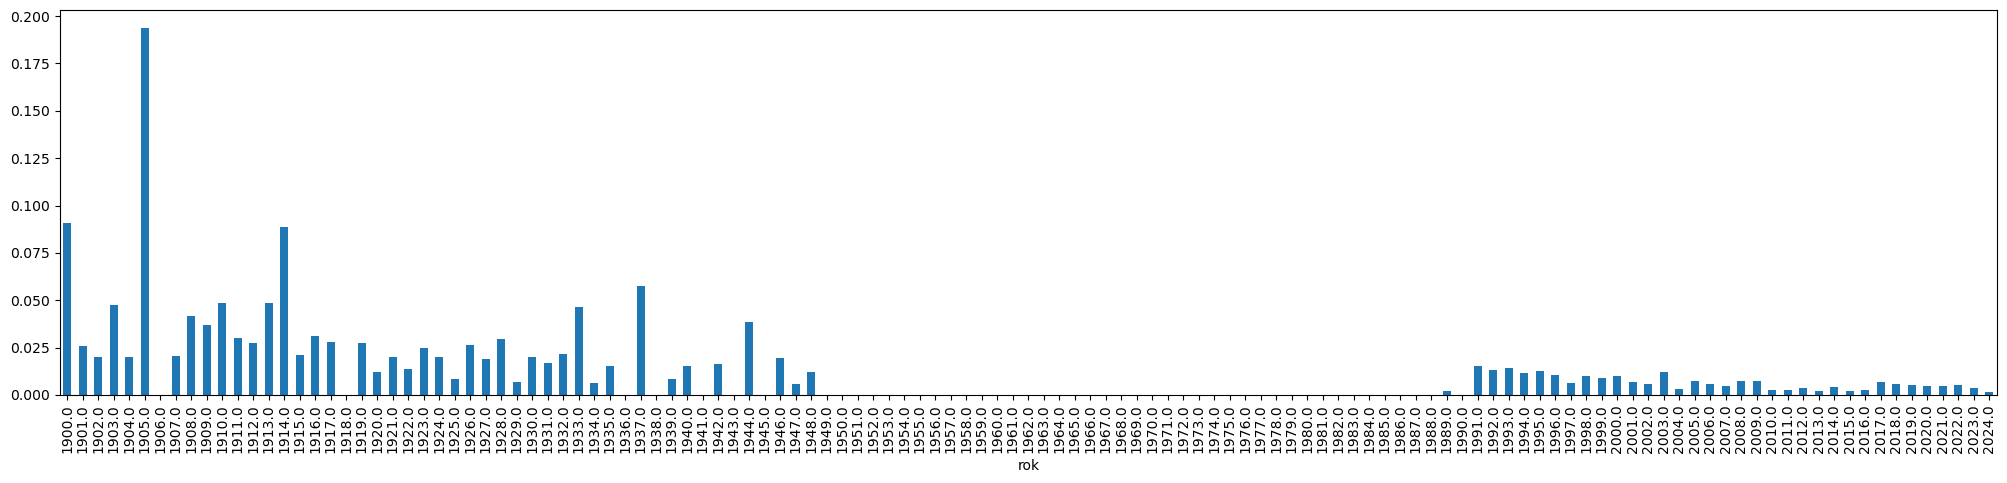

In [305]:
graf('Marie')

<Axes: xlabel='rok'>

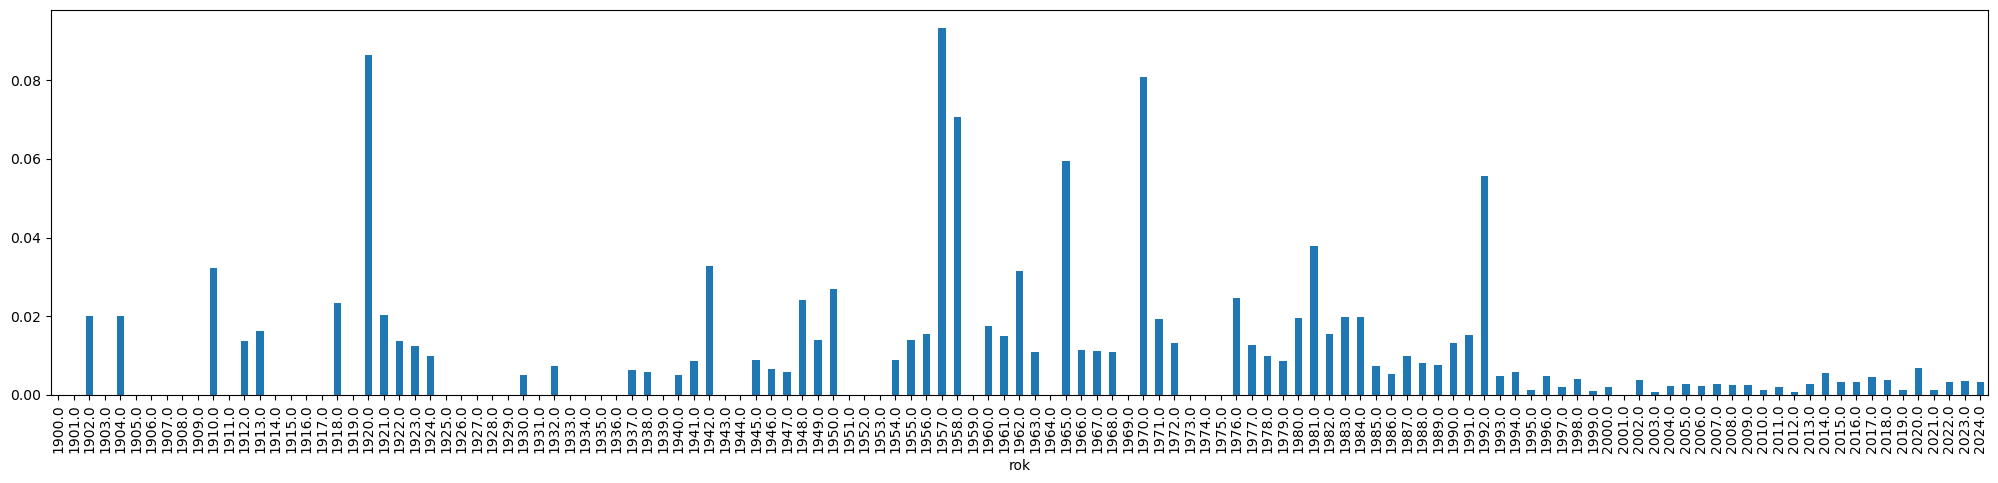

In [306]:
(df[df['kdo'] == 'Komenský, Jan Amos (1592-1670)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

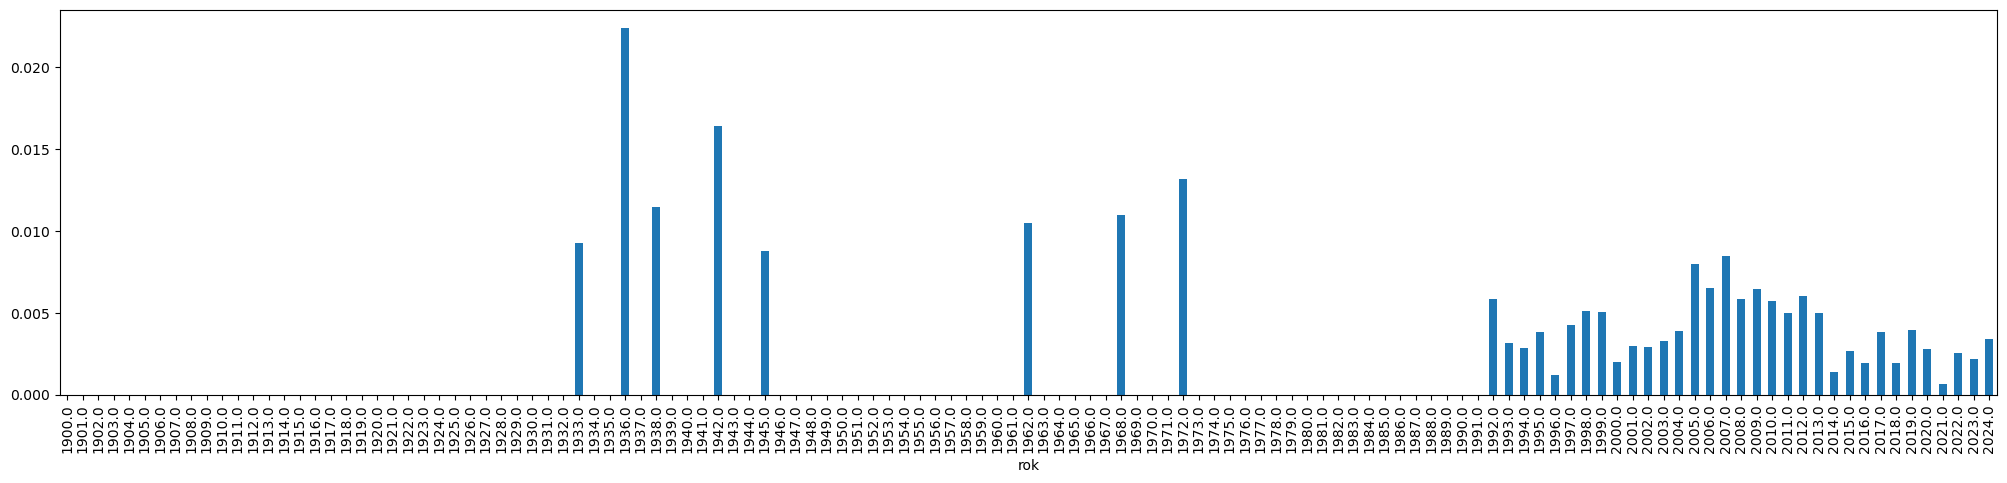

In [307]:
(df[df['kdo'] == 'Hitler, Adolf (1889-1945)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

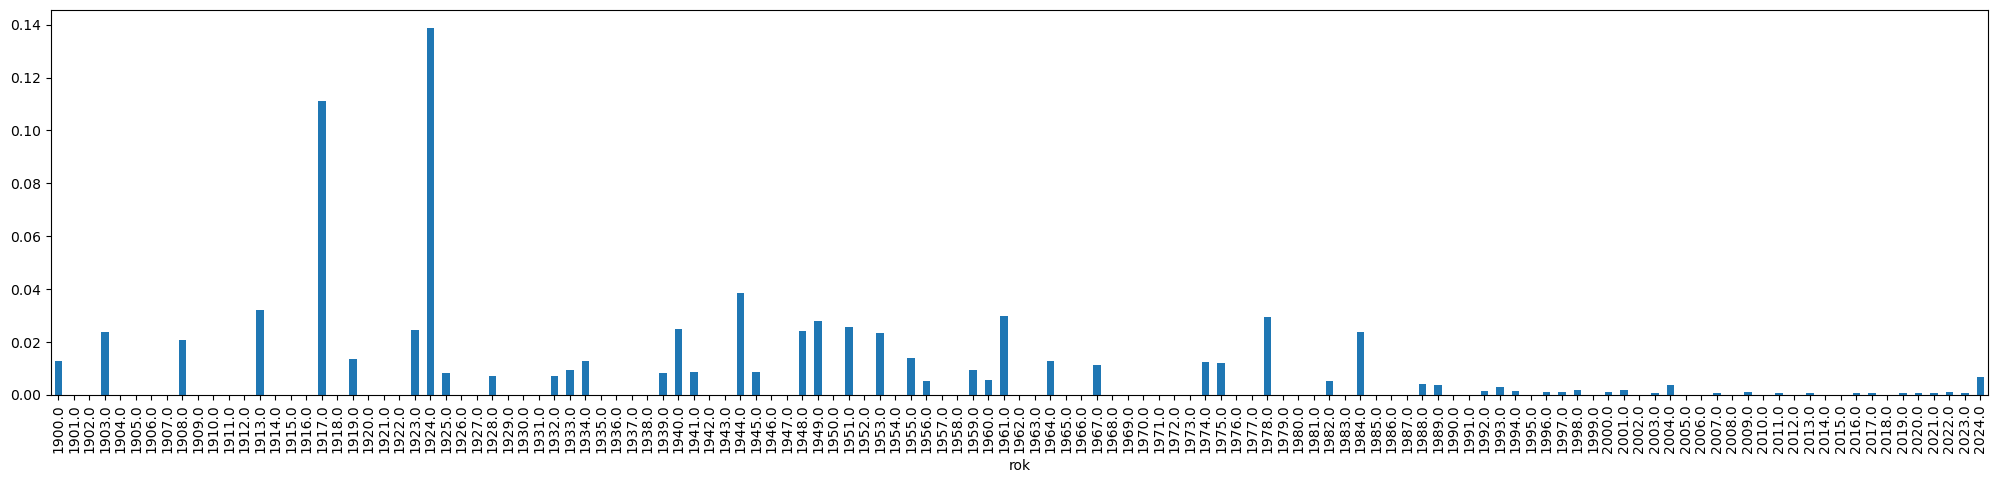

In [308]:
(df[df['kdo'] == 'Smetana, Bedřich (1824-1884)'].groupby('rok').size() / df[df['600_a'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))